In [94]:
import json
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy.stats
import pandas as pd
%matplotlib inline
plt.rcParams["figure.dpi"] = 150
BASE_PATH = os.path.abspath(os.path.join(os.getcwd(), os.pardir, 'results'))
OUTPUT_PATH = os.path.abspath(os.path.join(os.getcwd(), 'figures'))

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [95]:
# Adapted from https://towardsdatascience.com/making-matplotlib-beautiful-by-default-d0d41e3534fd
sns.set(font='Helvetica',
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.grid': True,
 'axes.axisbelow': True,
 'grid.color': 'lightgrey',
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})
sns.set_context("notebook", rc={"font.size":14,
                                "axes.titlesize":16,
                                "axes.labelsize":13})

## New data

In [96]:

BASE_PATH = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
DIRECT_BASE_PATH = os.path.join(BASE_PATH, 'fmi', 'out_tcp')
REDIS_BASE_BATH = os.path.join(BASE_PATH, 'fmi', 'out_redis')
S3_BASE_BATH = os.path.join(BASE_PATH, 'fmi', 'out_s3')
experiments = ['allreduce', 'bcast', 'gather', 'reduce', 'scan', 'scatter']

NUM_NODES = [2, 4, 8, 16, 32, 64, 128]

s3_data = []
for experiment in experiments:
    for num_node in NUM_NODES:
        
        dfs = []
        for rank in range(num_node):
                          
            mpi_path = os.path.join(S3_BASE_BATH, f"{experiment}_{num_node}_{rank}.json")
            
            data = pd.read_csv(mpi_path, names=['peer', 'idx', 'start', 'end', 'duration', 'retries'])[1:101]
            data.reset_index(inplace=True)
            dfs.append(data)
            #data['size'] = num_node
            #data['ranks'] = num_node
            #data['experiment'] = experiment
            #print(data)
        data = pd.concat(dfs)
        #print(data)
        max_data = data.groupby(['idx'])['duration'].max().reset_index()
        max_data['ranks'] = num_node
        max_data['experiment'] = experiment
        #print(max_data)
        s3_data.append(max_data)
        
s3_data = pd.concat(s3_data)
s3_data["method"] = "S3"

redis_data = []
for experiment in experiments:
    for num_node in NUM_NODES:
        
        dfs = []
        for rank in range(num_node):
                          
            mpi_path = os.path.join(REDIS_BASE_BATH, f"{experiment}_{num_node}_{rank}.json")
            
            data = pd.read_csv(mpi_path, names=['peer', 'idx', 'start', 'end', 'duration', 'retries'])[1:101]
            data.reset_index(inplace=True)
            dfs.append(data)
            #data['size'] = num_node
            #data['ranks'] = num_node
            #data['experiment'] = experiment
            #print(data)
        data = pd.concat(dfs)
        #print(data)
        max_data = data.groupby(['idx'])['duration'].max().reset_index()
        max_data['ranks'] = num_node
        max_data['experiment'] = experiment
        #print(max_data)
        redis_data.append(max_data)
        
redis_data = pd.concat(redis_data)
redis_data["method"] = "Redis"

tcp_data = []
NUM_NODES = [2, 4, 8, 16, 32, 64, 128, 256]
for experiment in experiments:
    for num_node in NUM_NODES:
        
        dfs = []
        for rank in range(num_node):
                          
            for rep in range(30):
                mpi_path = os.path.join(DIRECT_BASE_PATH, f"{experiment}_{num_node}_{rank}_{rep+1}.json")
                #print(mpi_path)
                data = pd.read_csv(mpi_path, names=['peer', 'idx', 'start', 'end', 'duration', 'retries'])[1:]
                data['idx'] = rep
                data.reset_index(inplace=True)
                dfs.append(data)
            #data['size'] = num_node
            #data['ranks'] = num_node
            #data['experiment'] = experiment
            #print(data)
        data = pd.concat(dfs)
        #print(data)
        #print(data)
        max_data = data.groupby(['idx'])['duration'].max().reset_index()
        max_data['ranks'] = num_node
        max_data['experiment'] = experiment
        #print(max_data)
        tcp_data.append(max_data)
        
tcp_data = pd.concat(tcp_data)
tcp_data["method"] = "Direct"

data = pd.concat([s3_data, redis_data, tcp_data])


In [84]:
tcp_data = []
#NUM_NODES = [2, 4, 8, 16, 32, 64, 128]
NUM_NODES = [32]
for experiment in experiments:
    for num_node in NUM_NODES:
        
        dfs = []
        for rank in range(num_node):
                          
            for rep in range(30):
                mpi_path = os.path.join(DIRECT_BASE_PATH, f"{experiment}_{num_node}_{rank}_{rep+1}.json")
                #print(mpi_path)
                data = pd.read_csv(mpi_path, names=['peer', 'idx', 'start', 'end', 'duration', 'retries'])[1:]
                data['idx'] = rep
                data.reset_index(inplace=True)
                dfs.append(data)
            #data['size'] = num_node
            #data['ranks'] = num_node
            #data['experiment'] = experiment
            #print(data)
        data = pd.concat(dfs)
        #print(data)
        #print(data)
        max_data = data.groupby(['idx'])['duration'].max().reset_index()
        max_data['ranks'] = num_node
        max_data['experiment'] = experiment
        #print(max_data)
        tcp_data.append(max_data)
        
tcp_data = pd.concat(tcp_data)
tcp_data["method"] = "Direct"

data = pd.concat([s3_data, redis_data, tcp_data])
print(tcp_data)

    idx  duration  ranks experiment  method
0     0      5556     32  allreduce  Direct
1     1      7795     32  allreduce  Direct
2     2      4230     32  allreduce  Direct
3     3      5901     32  allreduce  Direct
4     4      5284     32  allreduce  Direct
..  ...       ...    ...        ...     ...
25   25      2006     32    scatter  Direct
26   26      1366     32    scatter  Direct
27   27       865     32    scatter  Direct
28   28      1324     32    scatter  Direct
29   29      3438     32    scatter  Direct

[180 rows x 5 columns]


'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


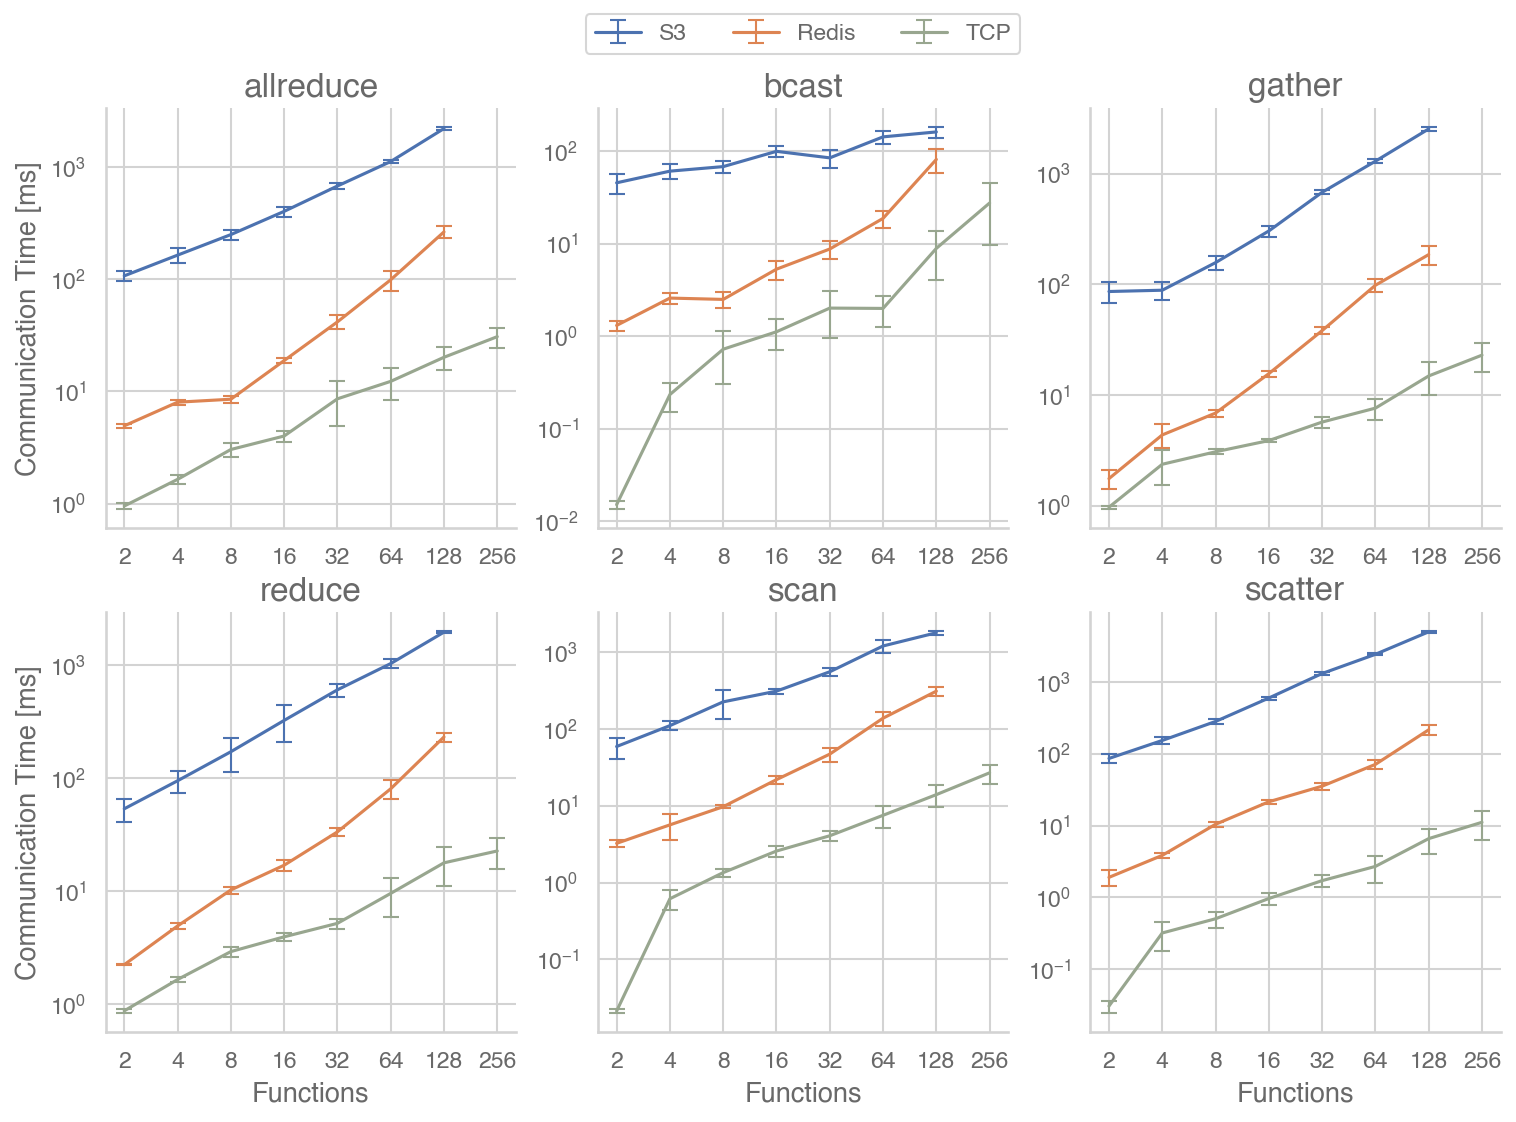

In [103]:

my_pal = {
    "Redis": "C1", 
    "Direct": "#98a68f", 
    "S3": "C0"
}
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

NUM_NODES = [2, 4, 8, 16, 32, 64, 128, 256]
#for method in ["Direct", "Redis", "S3"]:
for method in ["S3", "Redis", "Direct"]:
#for method in ["S3", "Redis"]:
    ix, iy = 0, 0
    for experiment in experiments:
        plot_data = {}
        error = []
        preds = {}
        for num_node in NUM_NODES:
            if num_node > 128 and method == "S3":
                continue
            if num_node > 128 and method == "Redis":
                continue
            if num_node > 256 and method == "Direct":
                continue
            experiment_sizes = {
                "allreduce": 4,
                "bcast": 4,
                "gather": 5000 / num_node,
                "reduce": 4,
                "scan": 4,
                "scatter": 5000 / num_node
            }
            #model_pred = get_model_op_latency(num_node, method, experiment, experiment_sizes[experiment])
            #preds[num_node] = model_pred
            #values = vals[experiment].loc[(vals[experiment]['n'] == num_node) & (vals[experiment]['method'] == method)]['latency']
            values = data.loc[
                (data['experiment'] == experiment) & (data['ranks'] == num_node)
                & (data['method'] == method)
            ]['duration']
            mean = np.mean(values)
            ci = scipy.stats.sem(values) * scipy.stats.t.ppf((1 + 0.95) / 2., len(values) - 1)
            plot_data[num_node] = mean / 1000
            error.append(ci / 1000)
            
        #print(method, values)
        axs[ix,iy].errorbar(plot_data.keys(), plot_data.values(), error, elinewidth=1, capsize=4, label=method, c=my_pal[method])
        axs[ix,iy].scatter(preds.keys(), preds.values(), marker="X", c=my_pal[method])
        axs[ix,iy].set_title(experiment)
        axs[ix,iy].set_yscale('log')
        axs[ix,iy].set_xscale('log')
        #axs[ix,iy].set_xlim(2, 64)
        axs[ix,iy].set_xticks(NUM_NODES)
        axs[ix,iy].set_xticklabels(NUM_NODES)
        if ix == 0 and iy == 1:
            handles, labels = axs[ix,iy].get_legend_handles_labels()
            axs[ix,iy].legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=3, handles=handles,labels=["S3", "Redis", "TCP"], fancybox=True)
        else:
            axs[ix,iy].legend([],[], frameon=False)
        if ix == 1:
            axs[ix,iy].set_xlabel("Functions")
        else:
            axs[ix,iy].set_xlabel(None)
        if iy == 0:
            axs[ix,iy].set_ylabel("Communication Time [ms]")
        else:
            axs[ix,iy].set_ylabel(None)
        iy += 1
        if iy > 2:
            iy = 0
            ix = 1
fig.savefig(os.path.join(OUTPUT_PATH, "fmi_benchmark_collectives.pdf"), bbox_inches='tight')

'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


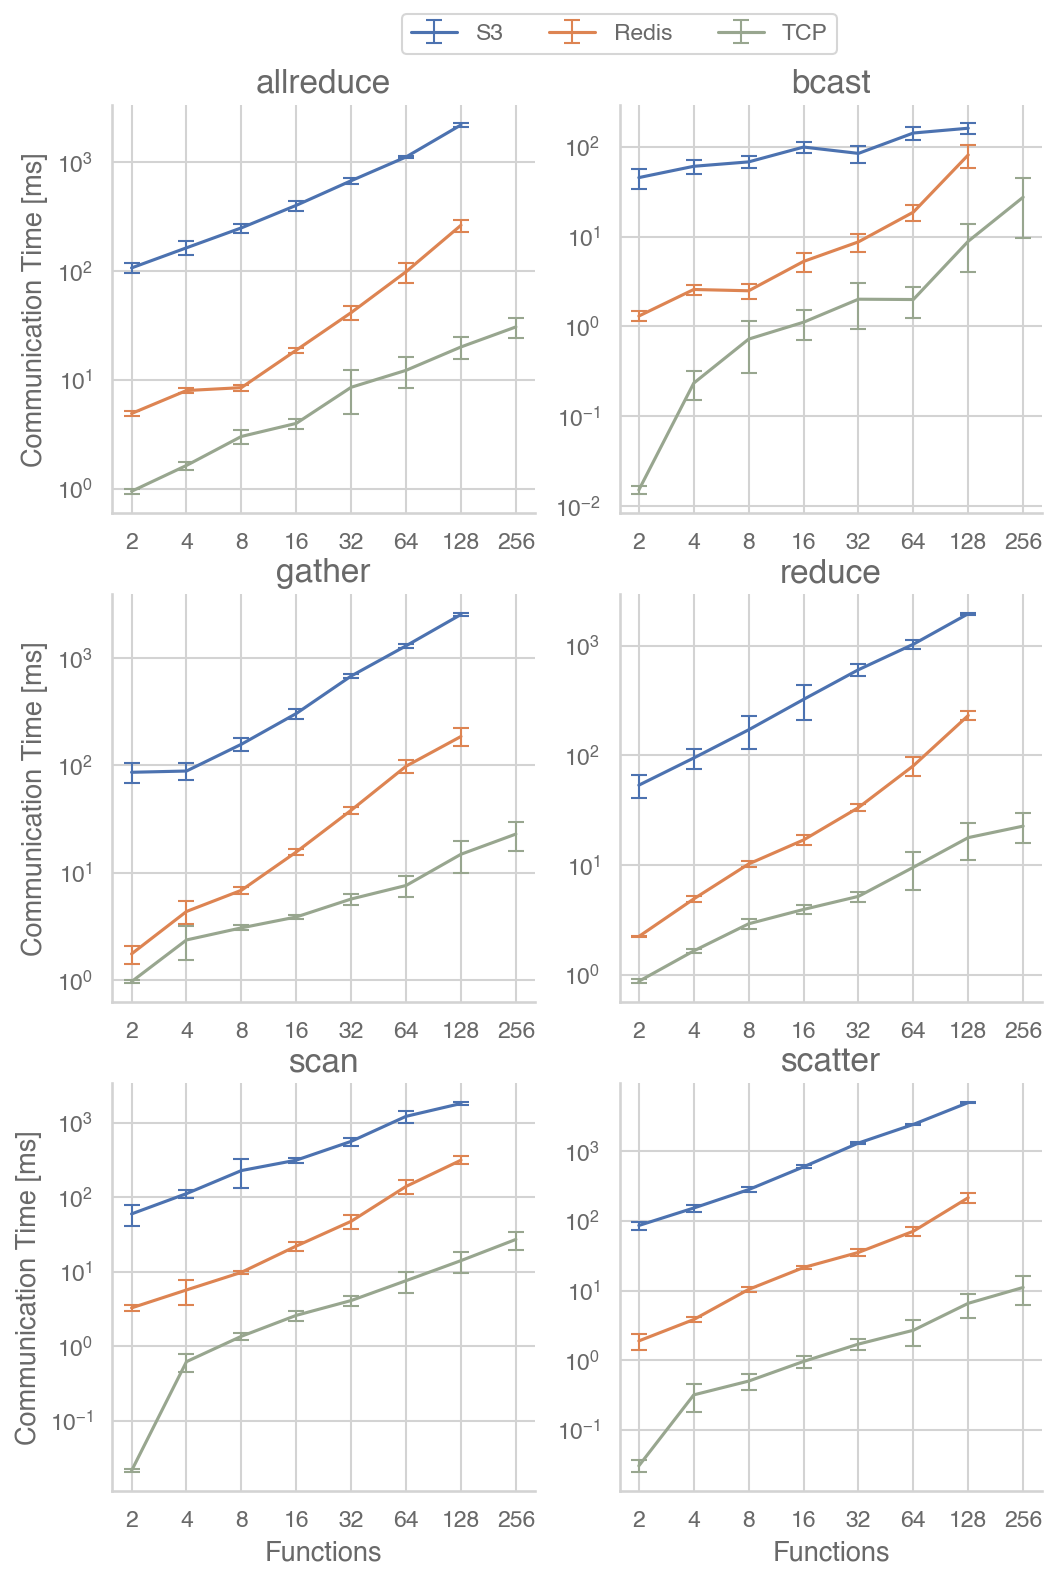

In [107]:

my_pal = {
    "Redis": "C1", 
    "Direct": "#98a68f", 
    "S3": "C0"
}
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(8,12))

NUM_NODES = [2, 4, 8, 16, 32, 64, 128, 256]
#for method in ["Direct", "Redis", "S3"]:
for method in ["S3", "Redis", "Direct"]:
#for method in ["S3", "Redis"]:
    ix, iy = 0, 0
    for experiment in experiments:
        plot_data = {}
        error = []
        preds = {}
        for num_node in NUM_NODES:
            if num_node > 128 and method == "S3":
                continue
            if num_node > 128 and method == "Redis":
                continue
            if num_node > 256 and method == "Direct":
                continue
            experiment_sizes = {
                "allreduce": 4,
                "bcast": 4,
                "gather": 5000 / num_node,
                "reduce": 4,
                "scan": 4,
                "scatter": 5000 / num_node
            }
            #model_pred = get_model_op_latency(num_node, method, experiment, experiment_sizes[experiment])
            #preds[num_node] = model_pred
            #values = vals[experiment].loc[(vals[experiment]['n'] == num_node) & (vals[experiment]['method'] == method)]['latency']
            values = data.loc[
                (data['experiment'] == experiment) & (data['ranks'] == num_node)
                & (data['method'] == method)
            ]['duration']
            mean = np.mean(values)
            ci = scipy.stats.sem(values) * scipy.stats.t.ppf((1 + 0.95) / 2., len(values) - 1)
            plot_data[num_node] = mean / 1000
            error.append(ci / 1000)
            
        #print(method, values)
        axs[ix,iy].errorbar(plot_data.keys(), plot_data.values(), error, elinewidth=1, capsize=4, label=method, c=my_pal[method])
        axs[ix,iy].scatter(preds.keys(), preds.values(), marker="X", c=my_pal[method])
        axs[ix,iy].set_title(experiment)
        axs[ix,iy].set_yscale('log')
        axs[ix,iy].set_xscale('log')
        #axs[ix,iy].set_xlim(2, 64)
        axs[ix,iy].set_xticks(NUM_NODES)
        axs[ix,iy].set_xticklabels(NUM_NODES)
        if ix == 0 and iy == 1:
            handles, labels = axs[ix,iy].get_legend_handles_labels()
            axs[ix,iy].legend(loc='upper center', bbox_to_anchor=(0, 1.25), ncol=3, handles=handles,labels=["S3", "Redis", "TCP"], fancybox=True)
        else:
            axs[ix,iy].legend([],[], frameon=False)
        if ix == 2:
            axs[ix,iy].set_xlabel("Functions")
        else:
            axs[ix,iy].set_xlabel(None)
        if iy == 0:
            axs[ix,iy].set_ylabel("Communication Time [ms]")
        else:
            axs[ix,iy].set_ylabel(None)
        iy += 1
        if iy > 1:
            iy = 0
            ix += 1
fig.savefig(os.path.join(OUTPUT_PATH, "fmi_benchmark_collectives_3x2.pdf"), bbox_inches='tight')